## Đọc dữ liệu

In [2]:
import pandas as pd
data = pd.read_csv('GDPlist.csv', encoding = 'ISO-8859-1')
# hiển thị 10 dòng đầu tiên của dữ liệu
data.head(10)

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644
5,Australia,Oceania,1488221
6,Austria,Europe,419243
7,Azerbaijan,Europe,62321
8,Bahrain,Asia,26108
9,Bangladesh,Asia,113032


### Cấu trúc bộ dữ liệu

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB
None


### Giải quyết vấn đề

### 1. Bộ dữ liệu chứa bao nhiêu dòng, bao nhiêu cột?

Bộ dữ liệu có 3 cột, 125 dòng, không có dữ liệu khuyết thiếu 

### 2. Thang đo tương ứng của các thuộc tính

+ Country, Continent: Thang đo định danh
+ GDP: Thang đo tỉ lệ

### 3. GDP các quốc gia có đồng đều không?

In [4]:
data.describe()

,GDP (millions of US$)
count,1.250000e+02
mean,5.554278e+05
std,1.649266e+06
min,1.060000e+04
25%,2.574200e+04
50%,9.608900e+04
75%,3.332380e+05
max,1.509402e+07


In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.bar(x, data['Country'])
plt.title('Phân bổ GDP các quốc gia')
plt.xlabel('GDP (millions of US$)')
plt.ylabel('Country')
plt.show()

NameError: name 'x' is not defined

GDP trung bình: 555427.784
GDP trung vị: 96089.0


Text(0, 0.5, 'Số lượng các quốc gia')

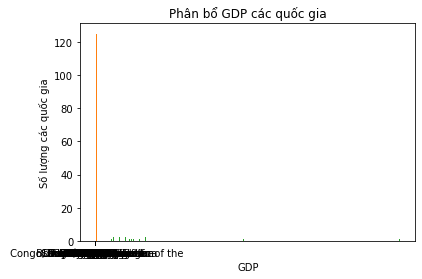

In [32]:
datanew = data.rename(columns = {"GDP (millions of US$)":"GDP"})

print("GDP trung bình: " + str(datanew.GDP.mean()))
print("GDP trung vị: " + str(datanew.GDP.median()))

import matplotlib.pyplot as plt
plt.hist(datanew, bins = 150)
plt.title("Phân bổ GDP các quốc gia")
plt.xlabel("GDP")
plt.ylabel("Số lượng các quốc gia")

Nhận xét:
+ Có 50% quốc gia có GDP nhỏ hơn 96,089.0 và có 50% quốc gia có GDP > 96,089.0, giá trị trung bình 555,429 chứng tỏ có một vài quốc gia có GDP rất lớn khác biệt hoàn toàn so với các nước còn lại

+ Biểu đồ phân bố: Đa số các quốc gia có GDP thấp, một số lượng các nước có GDP trung bình, cao, cá biệt có một vài nước có gdp cao bỏ xa các nước còn lại

### 4. Mỗi châu lục có bao nhiêu quốc gia nằm trong bảng dữ liệu

In [14]:
continent_bn = datanew.groupby('Continent')['Country'].count()
continent_bn.head(6)

Continent
Africa           29
Asia             36
Europe           37
North America    11
Oceania           3
South America     9
Name: Country, dtype: int64

Châu Phi: 29 nước, Châu Á: 36 nước, Châu Âu: 37 nước, Bắc Mỹ 11 nước, Oceania: 3 nước, Nam Mỹ: 9 nước

### 5. Tổng GDP các châu lục

In [21]:
continent_gdp = datanew.groupby('Continent')['GDP'].sum()
continent_gdp.head(6)

Continent
Africa            1820811
Asia             24425891
Europe           19139380
North America    18238447
Oceania           1662727
South America     4141217
Name: GDP, dtype: int64

Tổng GDP:    
Châu Á:            24425891, Châu Âu:           19139380, Bắc Mỹ:    18238447, Nam Mỹ:     4141217, Châu Phi:            1820811, Châu Úc           1662727

### 6. Top 10 quốc gia có GDP cao nhất

In [25]:
print("Top 10 quốc gia có GDP cao nhất")
country_top = datanew.sort_values('GDP', ascending = False)
country_top.head(10)

Top 10 quốc gia có GDP cao nhất


,Country,Continent,GDP
118,United States,North America,15094025
23,China,Asia,7298147
60,Japan,Asia,5869471
44,Germany,Europe,3577031
41,France,Europe,2776324
15,Brazil,South America,2492908
117,United Kingdom,Europe,2417570
58,Italy,Europe,2198730
93,Russia,Asia,1850401
21,Canada,North America,1736869
